# Business Intelligence Solutions For Bay Technologies

## Business Understanding:
The client has collected transactional data for the year 2019 but has not been able to leverage it for insights. They seek to extract meaningful information from the data to identify key opportunities to boost sales and improve operational efficiency. They are specifically interested in understanding revenue trends, seasonality trends, product sales performance, and customer preferences across different time periods and locations. Their goal is to make data-driven decisions to optimize their business operations, sales and makerting strategies and overall business performance.



### Problem Statement:
Our client is unable to utilize their 2019 transactional data effectively to gain business insights. They need to understand product sales performance, identify seasonal trends, and analyze product and city-based performance to uncover sales opportunities and optimize their product offerings and operational strategy. This analysis will inform them to make better data driven business decisions.


### Project Goal
The objective is to design and deliver an end-to-end business intelligence solution that analyzes the client’s 2019 transactional data by leveraging on the CRISP-DM methodology. The goal is to generate insights on sales trends, seasonality trends, product performance, analyze geographical delivery patterns and provide actionable recommendations to help the client increase sales and improve efficiency. The solution will also categorize products based on their price levels and uncover additional insights beyond the client’s specific questions.



##### Stakeholders

- Management
- Marketing 
- Data Team




### Features

- Order_ID: It is the unique number of a purchased product

- Product: Type of product purchased.

- Quantity_Ordered: Number of products purchased

- Price_Each: Price per unit of each product purchased

- Order_Date: The date the product was purchased

- Purchase_Address: The address of the customer






## Hypothesis

- Null Hypothesis (Ho): High-level products (priced above $99.99) do not generate a higher portion of revenue compared to basic-level products (priced $99.99 or below). 

- Alternative Hypothesis (H1): High-level products (priced above $99.99) generate a higher portion of revenue compared to basic-level products (priced $99.99 or below). 







## Business Questions

1. Revenue Analysis: How much revenue was generated in 2019 from all transactions?

2. Seasonality Detection: Are there any noticeable seasonal trends in sales (e.g., spikes in specific months or quarters)?

3. Product Performance: What are the best-selling and worst-selling products in terms of revenue and quantity sold?

4. Time Comparison: How do sales numbers compare across different time periods (months and weeks) ? Are there any trends, patterns or inconsistencies?

5. Geographic Distribution: Which cities contribute the most to product deliveries and sales?

6. Product Category Analysis: How do product categories compare in terms of revenue generated and quantities sold? Are high-level products driving more revenue compared to basic-level products?



### Additional Insights 

What additional insights can be derived from the data, such as customer buying behavior, high-performing time periods, or operational inefficiencies?
The answers to these questions will help the client make data-driven decisions to optimize their sales strategy, improve product offerings, and enhance operational efficiency.

The final deliverable will be a comprehensive report and dashboard that visualizes these insights, helping the client make data-driven decisions.







## Data Understanding & Preparation

Before I clean and analyze the data I install and import all relevant libraries we will need. I also connect to all the data sources in other to view what is in there.

In [1]:
%pip install pyodbc  
%pip install python-dotenv
%pip install squarify


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import squarify
import re
from datetime import datetime


from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm




import warnings
warnings.filterwarnings('ignore')


In [3]:
#Load environment variables from .env file into a dictionary

environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server

connection=pyodbc.connect(connection_string)

In [5]:
db_query='''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_SCHEMA= 'dbo' '''


In [6]:
data_2= pd.read_sql(db_query, connection)

In [7]:
data_2

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [8]:
#Loading July_2019

query = "SELECT * FROM dbo.Sales_July_2019"
Jul_2019 = pd.read_sql(query, connection)


#Loading Aug_2019 

query = "SELECT * FROM dbo.Sales_August_2019"
Aug_2019 = pd.read_sql(query, connection)


#Loading Sep_2019 

query = "SELECT * FROM dbo.Sales_September_2019"
Sep_2019 = pd.read_sql(query, connection)


#Loading Oct_2019 

query = "SELECT * FROM dbo.Sales_October_2019"
Oct_2019 = pd.read_sql(query, connection)


#Loading Nov_2019 

query = "SELECT * FROM dbo.Sales_November_2019"
Nov_2019 = pd.read_sql(query, connection)


#Loading Dec_2019 
query = "SELECT * FROM dbo.Sales_December_2019"

Dec_2019 = pd.read_sql(query, connection)



In [9]:
#Load the data from the CSV files (Jan_2019 - Jun_2019)


Jan_2019= pd.read_csv('../Data/Sales_January_2019.csv')
Feb_2019= pd.read_csv('../Data/Sales_February_2019.csv')
Mar_2019= pd.read_csv('../Data/Sales_March_2019.csv')
Apr_2019= pd.read_csv('../Data/Sales_April_2019.csv')
May_2019= pd.read_csv('../Data/Sales_May_2019.csv')
Jun_2019= pd.read_csv('../Data/Sales_June_2019.csv')




# Exploring All Datasets (EDA) & Data Cleaning

A deep dive and observation to have an overview on the kind of dataset we are dealing with. (variables, data types, inconsistencies e.t.c)

In [10]:
Jan_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [11]:
Feb_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [12]:
Jul_2019.head()


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [13]:
Aug_2019.head()


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


### Concatenate all the datasets from Jan_2019 to Dec 2019

In [14]:
# Rename the columns
Jan_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Feb_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Mar_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Apr_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
May_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Jun_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)

In [15]:
# Combine all datasets by column names
Sales_2019= pd.concat([Jan_2019, Feb_2019, Mar_2019, Apr_2019, May_2019, Jun_2019, Jul_2019, Aug_2019, Sep_2019, Oct_2019, Nov_2019, Dec_2019])

In [16]:
Sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


### Preprocessing the data to check the quality of the combined dataset (Sales_2019)

In [17]:
# Explore the combined dataset to have an overview on the kind of dataset we are dealing with (variables, data types, inconsistencies e.t.c)

Sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [18]:
# View the upper part of the dataset (Sale_2019)

Sales_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [19]:
# View the lower part of the dataset (Sales_2019)
Sales_2019.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001"


In [20]:
# Show the shape of the dataset (Sales_2019)

Sales_2019.shape

(186850, 6)

In [21]:
# Check the data types in each columnn
Sales_2019.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [22]:
# Check for uniques values in each column

Sales_2019.nunique()

Order_ID            178438
Product                 20
Quantity_Ordered        18
Price_Each              40
Order_Date          142396
Purchase_Address    140788
dtype: int64

In [23]:
# Show the Summary Statistics for Sales_2019

Sales_2019.describe().T

,count,unique,top,freq
Order_ID,186110,178438,Order ID,160
Product,186305,20,USB-C Charging Cable,21903
Quantity_Ordered,186110.0,18.0,1.0,91347.0
Price_Each,186110.0,40.0,11.95,11951.0
Order_Date,186110,142396,Order Date,160
Purchase_Address,186305,140788,Purchase Address,355


In [24]:
# Check for duplucated values in the dataset

Sales_2019.duplicated().sum()

1161

In [25]:
# Check for null values 

Sales_2019.isnull().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

In [26]:
Sales_2019.isnull().mean()*100

Order_ID            0.396040
Product             0.291678
Quantity_Ordered    0.396040
Price_Each          0.396040
Order_Date          0.396040
Purchase_Address    0.291678
dtype: float64

### Observations

The output shows that the Sales_2019 dataset is a pandas DataFrame with 186,850 entries and 6 columns. The columns in the dataset are Order_ID, Product, Quantity_Ordered, Price_Each, Order_Date and Purchase_Address.
The data types of all columns are object, indicating that the values in these columns are strings.

The dataset has a total of 10,224 rows (186,850 entries and 186,110 non-null entries).

This shows the number of unique values in each column. This information can be useful for understanding the diversity of values in each column and identifying any potential patterns or trends.:

- Order_ID: There are 178,438 unique values.
- Product: There are 20 unique values.
- Quantity_Ordered: There are 18 unique values.
- Price_Each: There are 40 unique values.
- Order_Date: There are 14,239 unique values.
- Purchase_Address: There are 14,078 unique values.










### Data validation & Cleaning

The existence of duplicates and null-values is crucial and can affect the data integrity, quality and accuracy in analysis. Therefore duplicate values and null-values is handled by conducting data cleaning on the dataset.

In [27]:
# Call only duplicated values
duplicates = Sales_2019[Sales_2019.duplicated(keep=False)]

# Print the duplicated rows
print(duplicates)

      Order_ID                Product Quantity_Ordered Price_Each  \
664        NaN                    NaN              NaN        NaN   
678        NaN                    NaN              NaN        NaN   
797        NaN                    NaN              NaN        NaN   
874     142071  AA Batteries (4-pack)                1       3.84   
875     142071  AA Batteries (4-pack)                1       3.84   
...        ...                    ...              ...        ...   
23748      NaN                Product              NaN        NaN   
23996      NaN                   None              NaN        NaN   
24192      NaN                Product              NaN        NaN   
24222      NaN                Product              NaN        NaN   
24730      NaN                   None              NaN        NaN   

           Order_Date              Purchase_Address  
664               NaN                           NaN  
678               NaN                           NaN  
797      

In [28]:
# Drop duplicate rows, keeping the first occurrence
Sales_2019_cleaned=Sales_2019.drop_duplicates(keep='first')

In [29]:
Sales_2019_cleaned

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016"
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001"
25114,319668.0,Vareebadd Phone,1.0,400.0,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101"
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001"


In [30]:
Sales_2019_cleaned.duplicated().sum()

0

In [31]:
Sales_2019_cleaned.isnull().sum()

Order_ID            2
Product             1
Quantity_Ordered    2
Price_Each          2
Order_Date          2
Purchase_Address    1
dtype: int64

In [32]:
null_products = Sales_2019_cleaned[Sales_2019_cleaned['Product'].isnull()]

# Print the rows with null values in the 'Product' column
print(null_products)

    Order_ID Product Quantity_Ordered Price_Each Order_Date Purchase_Address
664      NaN     NaN              NaN        NaN        NaN              NaN


In [33]:
Sales_2019_cleaned.fillna(0, inplace=True)

In [34]:
Sales_2019_cleaned.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [35]:
Sales_2019_cleaned.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [36]:
# Ensure that both 'Quantity_Ordered' and 'Price_Each' are numeric, handling any errors
Sales_2019_cleaned['Quantity_Ordered'] = pd.to_numeric(Sales_2019_cleaned['Quantity_Ordered'], errors='coerce')
Sales_2019_cleaned['Price_Each'] = pd.to_numeric(Sales_2019_cleaned['Price_Each'], errors='coerce')


In [37]:
# Convert 'Price_Each' to dollars
Sales_2019_cleaned['Price_Each'] = Sales_2019_cleaned['Price_Each'].apply(lambda x: x * 1.00)

In [38]:
# Create a new column 'Total_Revenue' by multiplying 'Quantity_Ordered' and 'Price_Each'
Sales_2019_cleaned['Total_Revenue'] = Sales_2019_cleaned['Quantity_Ordered'] * Sales_2019_cleaned['Price_Each']

In [39]:
# Display the DataFrame with the new 'Total_Revenue' column
Sales_2019_cleaned.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016",14.950000
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001",7.680000
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101",400.000000
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001",11.990000
25116,319670.0,Bose SoundSport Headphones,1.0,99.989998,2021-12-19 21:45:00.0000000,"747 Chestnut St, Los Angeles, CA 90001",99.989998


In [40]:
# Create a new column 'Product_Level' based on the condition of 'Price_Each'
Sales_2019_cleaned['Product_Level'] = np.where(Sales_2019_cleaned['Price_Each'] > 99.99, 'High-Level', 'Basic-Level')



In [41]:
Sales_2019_cleaned

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue,Product_Level
0,141234,iPhone,1.0,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",700.000000,High-Level
1,141235,Lightning Charging Cable,1.0,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",14.950000,Basic-Level
2,141236,Wired Headphones,2.0,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",23.980000,Basic-Level
3,141237,27in FHD Monitor,1.0,149.990000,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",149.990000,High-Level
4,141238,Wired Headphones,1.0,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",11.990000,Basic-Level
...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00.0000000,"14 Madison St, San Francisco, CA 94016",14.950000,Basic-Level
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00.0000000,"549 Willow St, Los Angeles, CA 90001",7.680000,Basic-Level
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00.0000000,"273 Wilson St, Seattle, WA 98101",400.000000,High-Level
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00.0000000,"778 River St, Dallas, TX 75001",11.990000,Basic-Level


In [42]:
# Convert 'Order_Date' to datetime (if not done already)
Sales_2019_cleaned['Order_Date'] = pd.to_datetime(Sales_2019_cleaned['Order_Date'], errors='coerce')

# Drop any rows with invalid dates (NaT values)
Sales_2019_cleaned = Sales_2019_cleaned.dropna(subset=['Order_Date'])

# Extract year, month, day, hour, and minute
Sales_2019_cleaned['Year'] = Sales_2019_cleaned['Order_Date'].dt.year
Sales_2019_cleaned['Month'] = Sales_2019_cleaned['Order_Date'].dt.month
Sales_2019_cleaned['Day'] = Sales_2019_cleaned['Order_Date'].dt.day
Sales_2019_cleaned['Hour'] = Sales_2019_cleaned['Order_Date'].dt.hour
Sales_2019_cleaned['Minute'] = Sales_2019_cleaned['Order_Date'].dt.minute



In [43]:
Sales_2019_cleaned

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue,Product_Level,Year,Month,Day,Hour,Minute
0,141234,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.000000,High-Level,2019,1,22,21,25
1,141235,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.950000,Basic-Level,2019,1,28,14,15
2,141236,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.980000,Basic-Level,2019,1,17,13,33
3,141237,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.990000,High-Level,2019,1,5,20,33
4,141238,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.990000,Basic-Level,2019,1,25,11,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14.950000,Basic-Level,2011,12,19,20,58
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.680000,Basic-Level,2001,12,19,12,1
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",400.000000,High-Level,2009,12,19,6,43
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",11.990000,Basic-Level,2003,12,19,10,39


In [44]:
# Create a new DataFrame to store final cleaned data
Final_Sales_2019 = Sales_2019_cleaned.copy()

# Convert the 'Purchase_Address' column to string
Final_Sales_2019['Purchase_Address'] = Final_Sales_2019['Purchase_Address'].astype(str)

# Extract the city from 'Purchase_Address'
Final_Sales_2019['City'] = Final_Sales_2019['Purchase_Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)

# Display the first few rows to check if the city was extracted correctly
print(Final_Sales_2019[['Purchase_Address', 'City']].head())

                        Purchase_Address           City
0        944 Walnut St, Boston, MA 02215         Boston
1       185 Maple St, Portland, OR 97035       Portland
2  538 Adams St, San Francisco, CA 94016  San Francisco
3     738 10th St, Los Angeles, CA 90001    Los Angeles
4          387 10th St, Austin, TX 73301         Austin


In [45]:
# Display the Final Cleaned dataset

Final_Sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Total_Revenue,Product_Level,Year,Month,Day,Hour,Minute,City
0,141234,iPhone,1.0,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",700.000000,High-Level,2019,1,22,21,25,Boston
1,141235,Lightning Charging Cable,1.0,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",14.950000,Basic-Level,2019,1,28,14,15,Portland
2,141236,Wired Headphones,2.0,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",23.980000,Basic-Level,2019,1,17,13,33,San Francisco
3,141237,27in FHD Monitor,1.0,149.990000,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",149.990000,High-Level,2019,1,5,20,33,Los Angeles
4,141238,Wired Headphones,1.0,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",11.990000,Basic-Level,2019,1,25,11,59,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.950000,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",14.950000,Basic-Level,2011,12,19,20,58,San Francisco
25113,319667.0,AA Batteries (4-pack),2.0,3.840000,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",7.680000,Basic-Level,2001,12,19,12,1,Los Angeles
25114,319668.0,Vareebadd Phone,1.0,400.000000,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",400.000000,High-Level,2009,12,19,6,43,Seattle
25115,319669.0,Wired Headphones,1.0,11.990000,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",11.990000,Basic-Level,2003,12,19,10,39,Dallas


### Hypothesis Testing

In [46]:
# Test the hypothesis using ANOVA (Analysis of Variance)


# Step 2: Perform ANOVA
# Split the data into two groups based on 'Product_Level'
high_level_products = Final_Sales_2019[Final_Sales_2019['Product_Level'] == 'High-Level']['Total_Revenue']
basic_level_products = Final_Sales_2019[Final_Sales_2019['Product_Level'] == 'Basic-Level']['Total_Revenue']

# Perform ANOVA
f_value, p_value = stats.f_oneway(high_level_products, basic_level_products)

# Step 3: Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in revenue between high-level and basic-level products.")

Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.


Rejecting the Null Hypothesis: If the p-value is less than 0.05, it indicates that there is a significant difference in revenue between high-level and basic-level products.


1. Interpretation of the Outcome
- Reject the Null Hypothesis: The result indicates that there is a statistically significant difference in the total revenue generated by high-level products compared to basic-level products.
- Significance: This suggests that high-level products (priced above $99.99) are generating a different level of revenue compared to basic-level products (priced $99.99 or below). The revenue difference is not due to random chance but rather indicates a real effect.

2. Implications
- For Business Strategy: If you are a business, this result suggests that high-level products are significantly more profitable. You might want to consider focusing more on high-level products or exploring what makes them more successful.
- For Marketing: Understanding that high-level products generate significantly more revenue can help tailor marketing efforts and promotions to boost sales in this category.

3. Follow-Up Actions
- Further Analysis: You might want to explore additional factors affecting revenue or perform a more detailed analysis on why high-level products are more successful.
- Business Decisions: Use this insight to inform pricing strategies, product development, or investment decisions.


### Exploratory Data Analysis

In [47]:
# Summary Statistics for numerical Columns

summary_stats = Final_Sales_2019.describe()

summary_stats

,Quantity_Ordered,Price_Each,Order_Date,Total_Revenue,Year,Month,Day,Hour,Minute
count,185688.000000,185688.000000,185688,185688.000000,185688.000000,185688.000000,185688.000000,185688.000000,185688.000000
mean,1.124531,184.517268,2017-11-12 08:37:51.178427904,185.609936,2017.315260,7.058588,17.442899,14.412778,29.480220
min,0.000000,0.000000,1970-01-01 00:00:00,0.000000,1970.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,11.950000,2015-08-19 19:21:45,11.950000,2015.000000,4.000000,17.000000,11.000000,14.000000
50%,1.000000,14.950000,2019-03-26 14:18:00,14.950000,2019.000000,7.000000,19.000000,15.000000,29.000000
75%,1.000000,150.000000,2019-06-20 17:08:15,150.000000,2019.000000,10.000000,19.000000,19.000000,45.000000
max,9.000000,1700.000000,2031-12-19 23:53:00,3400.000000,2031.000000,12.000000,31.000000,23.000000,59.000000
std,0.443082,332.842596,NaN,333.030881,6.697495,3.502970,6.127005,5.423506,17.317858


In [48]:
# Step 1: Check the data types of the columns
print(Final_Sales_2019.dtypes)

# Step 2: Select only numeric columns
numeric_columns = Final_Sales_2019.select_dtypes(include='number')

# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

Order_ID                    object
Product                     object
Quantity_Ordered           float64
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Total_Revenue              float64
Product_Level               object
Year                         int32
Month                        int32
Day                          int32
Hour                         int32
Minute                       int32
City                        object
dtype: object
                  Quantity_Ordered  Price_Each  Total_Revenue      Year  \
Quantity_Ordered          1.000000   -0.148401      -0.139543 -0.000565   
Price_Each               -0.148401    1.000000       0.999202 -0.003526   
Total_Revenue            -0.139543    0.999202       1.000000 -0.003468   
Year                     -0.000565   -0.003526      -0.003468  1.000000   
Month                     0.000879   -0.003353      -0.003443 -0.202237   
Day                       0.002689   -0.000139

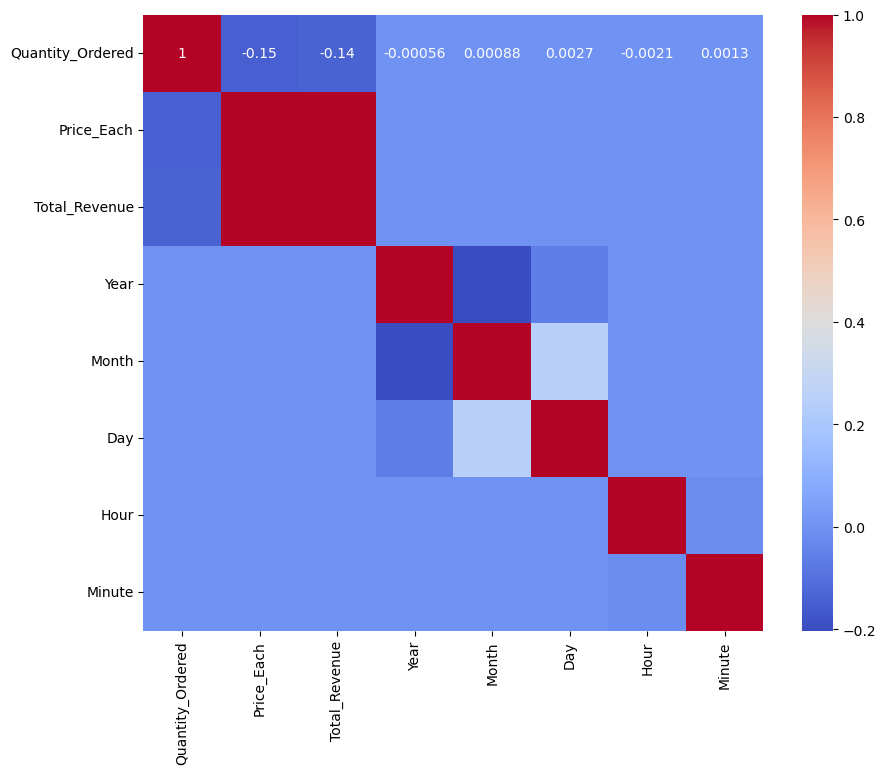

In [49]:
# Plot a heatmap of the Correlation Matrix

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

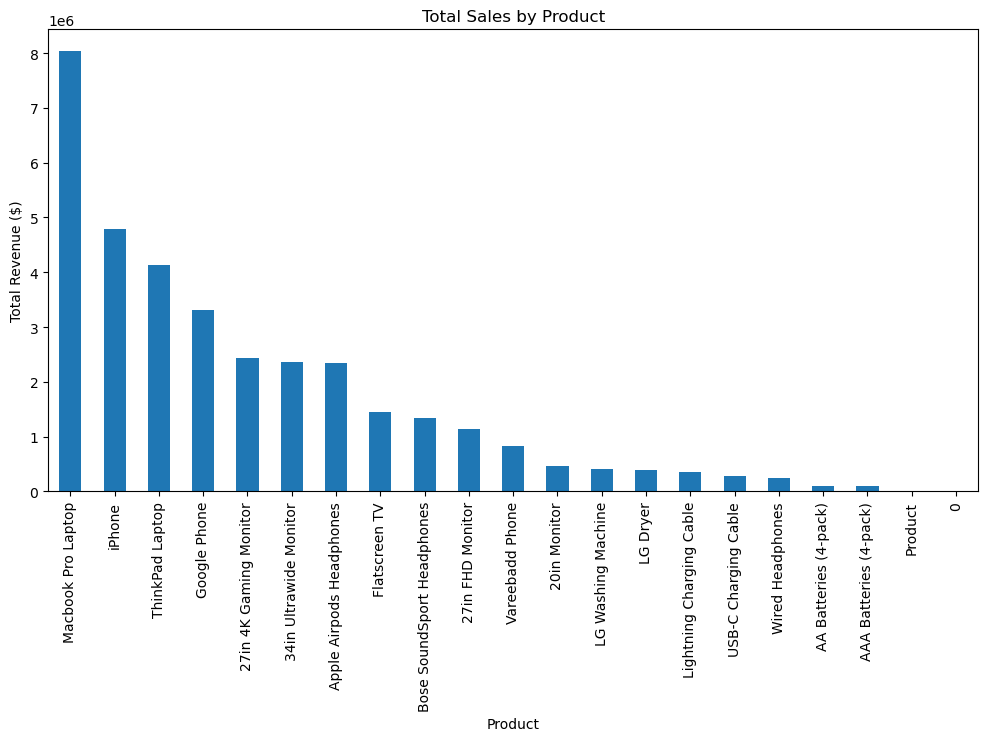

In [50]:
# Group by product and calculate total sales for each product
product_sales = Final_Sales_2019.groupby('Product')['Total_Revenue'].sum().sort_values(ascending=False)
# Print the product sales
# print(product_sales)

# Plot a bar chart for product sales
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.title('Total Sales by Product')
plt.xticks(rotation=90)
plt.show()

Total Revenue by Product Level:
Product_Level
Basic-Level    2.419990e+06
High-Level     3.204555e+07
Name: Total_Revenue, dtype: float64


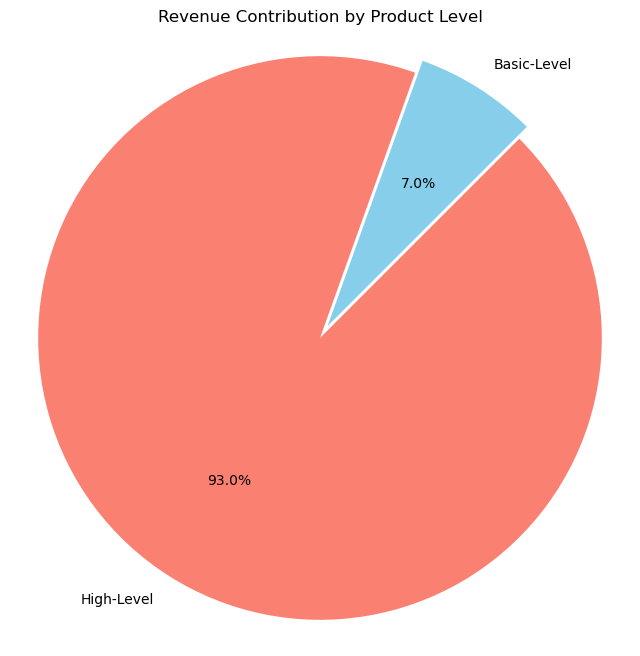

In [51]:
# Group by product level (High-Level, Basic-Level) and calculate total revenue
product_level_revenue = Final_Sales_2019.groupby('Product_Level')['Total_Revenue'].sum()

# Display the revenue for each product level
print("Total Revenue by Product Level:")
print(product_level_revenue)

# Plot a pie chart to visualize the revenue contribution of high-level and basic-level products
plt.figure(figsize=(8, 8))
plt.pie(product_level_revenue, labels=product_level_revenue.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=45, explode=[0.05, 0])
plt.title('Revenue Contribution by Product Level')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

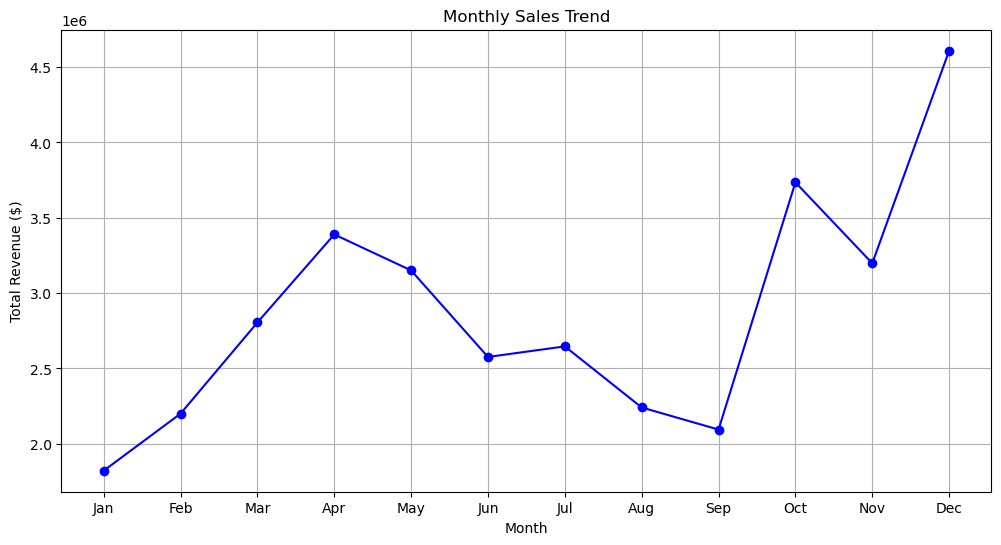

In [52]:
# Calculate total revenue per month
monthly_sales = Final_Sales_2019.groupby('Month')['Total_Revenue'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.show()


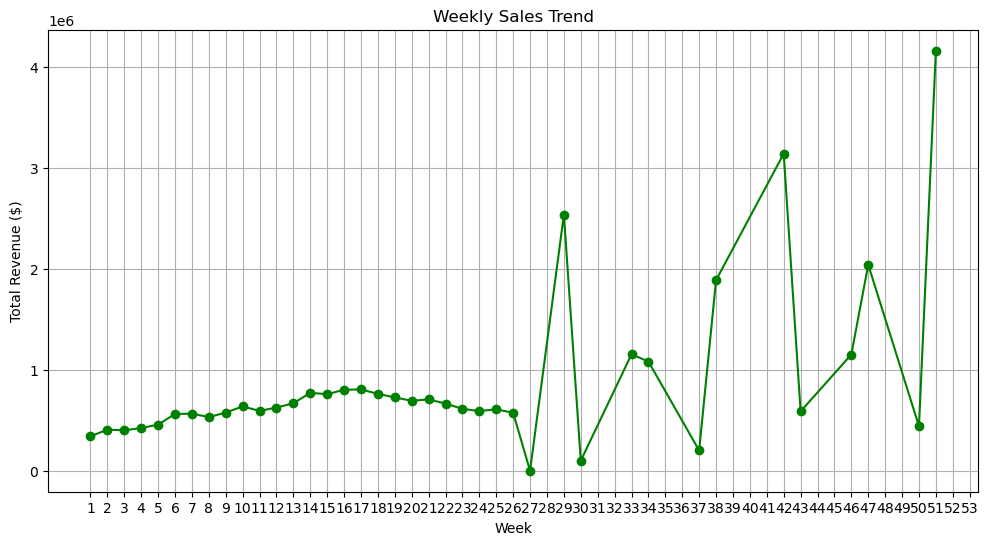

In [53]:
# Create a new column 'Week' to extract the week number from the 'Order_Date' column
Final_Sales_2019['Week'] = Final_Sales_2019['Order_Date'].dt.isocalendar().week

# Calculate total revenue per week
weekly_sales = Final_Sales_2019.groupby('Week')['Total_Revenue'].sum()

# Plot the weekly sales trend
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='green')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(1, 54))  # 1 to 53 weeks in a year (ISO calendar)
plt.grid(True)
plt.show()

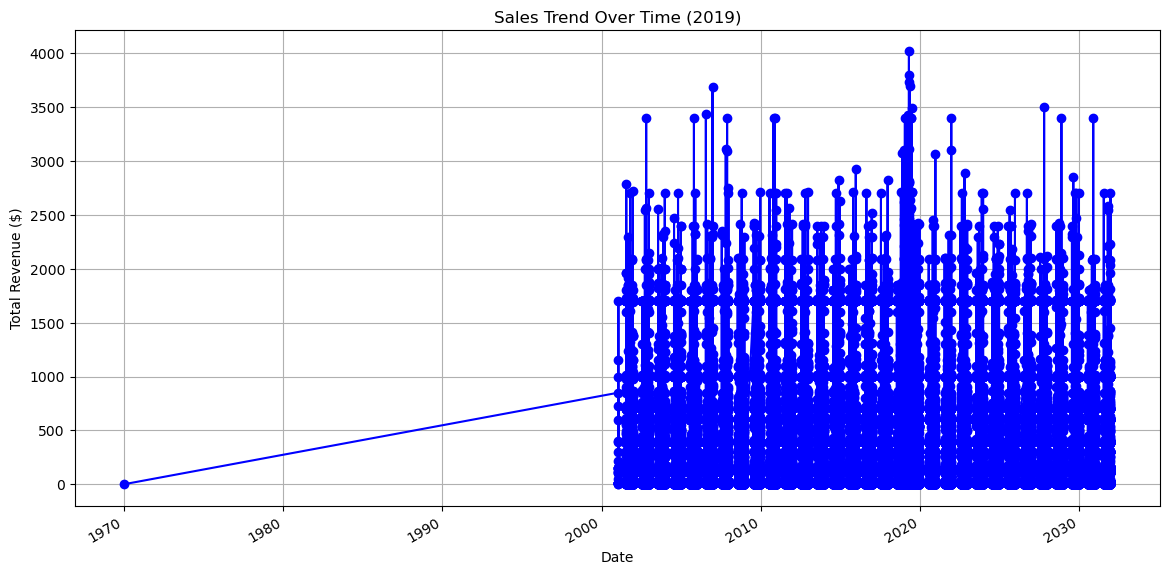

In [54]:
# Group by 'Order_Date' to calculate total revenue per day
daily_sales = Final_Sales_2019.groupby('Order_Date')['Total_Revenue'].sum()

# Plot the daily sales trend over time
plt.figure(figsize=(14, 7))
daily_sales.plot(kind='line', marker='o', color='blue')
plt.title('Sales Trend Over Time (2019)')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(True)

# Display the plot
plt.show()

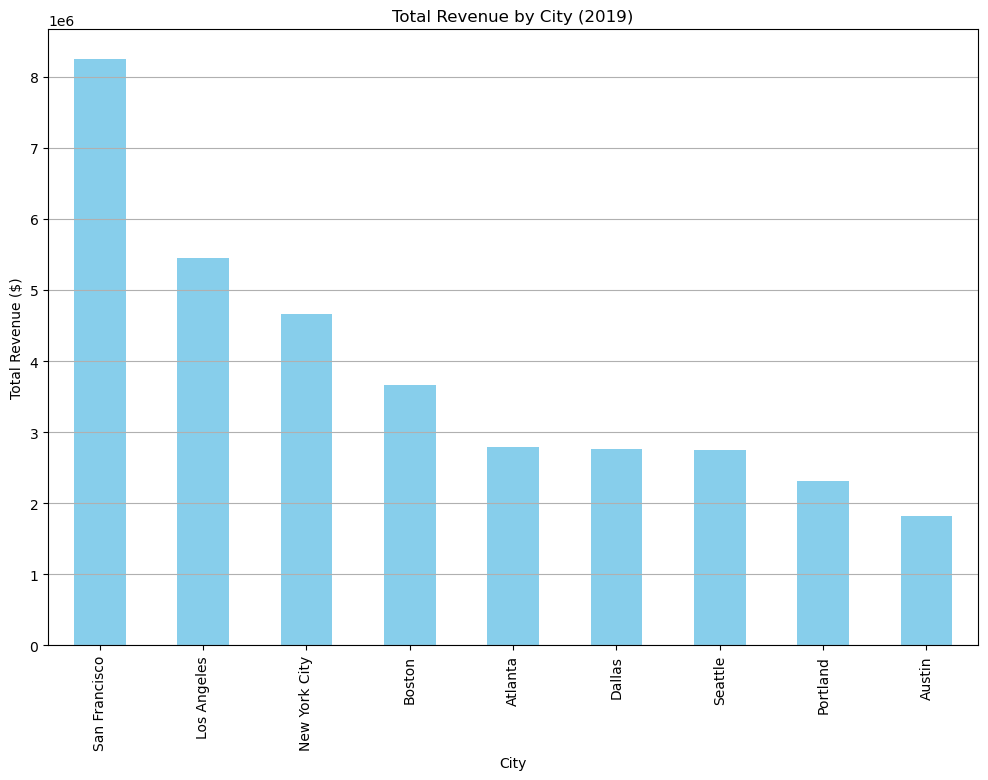

In [55]:


# Group by 'City' to calculate total revenue per city
revenue_by_city = Final_Sales_2019.groupby('City')['Total_Revenue'].sum().sort_values(ascending=False)

# Plot the total revenue by city
plt.figure(figsize=(12, 8))
revenue_by_city.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by City (2019)')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Display the plot
plt.show()

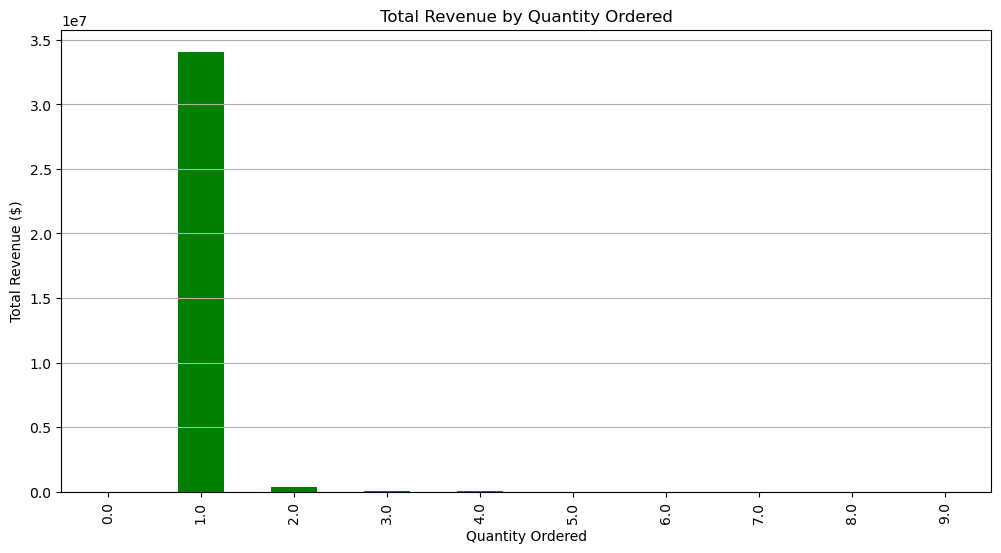

In [56]:
# Group by 'Quantity_Ordered' and sum the 'Total_Revenue'
revenue_by_quantity = Final_Sales_2019.groupby('Quantity_Ordered')['Total_Revenue'].sum()

# Plot the total revenue by quantity ordered
plt.figure(figsize=(12, 6))
revenue_by_quantity.plot(kind='bar', color='green')
plt.title('Total Revenue by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Revenue ($)')
plt.grid(True, axis='y')

# Display the plot
plt.show()

## Answering Business Questions

In [57]:
# 1. Revenue Analysis: How much revenue was generated in 2019 from all transactions?

# Total revenue for 2019
total_revenue_2019 = Final_Sales_2019['Total_Revenue'].sum()
print(f"Total Revenue Generated in 2019: ${total_revenue_2019:.2f}")


Total Revenue Generated in 2019: $34465537.85


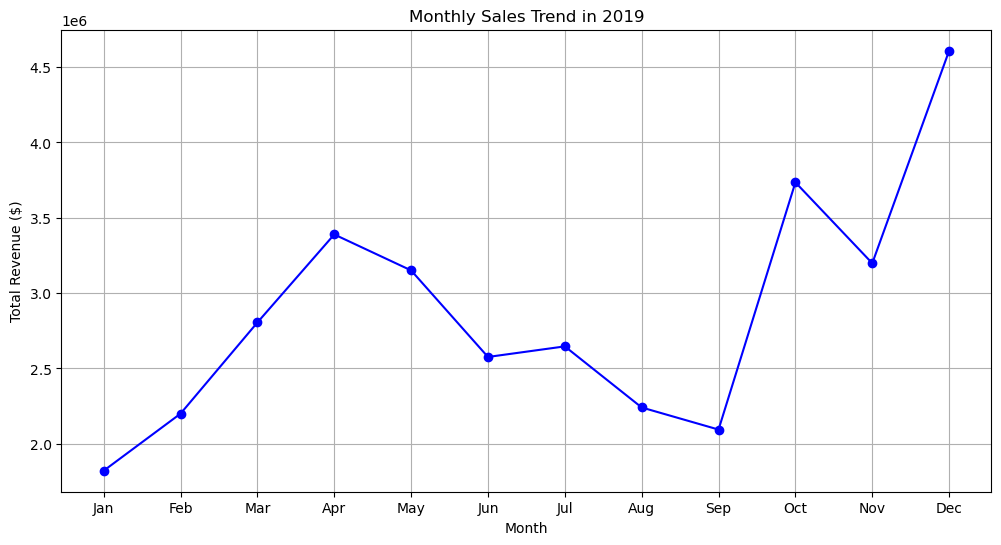

In [58]:
# 2. 2. Seasonality Detection: Are there any noticeable seasonal trends in sales (e.g., spikes in specific months or quarters)?

# Group by month to detect seasonality in sales
monthly_revenue = Final_Sales_2019.groupby('Month')['Total_Revenue'].sum()

# Plot the seasonal trend in sales
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend in 2019')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


Best-Selling Products (Revenue):
                        Total_Revenue  Quantity_Ordered
Product                                                
Macbook Pro Laptop       8.032500e+06            4725.0
iPhone                   4.792900e+06            6847.0
ThinkPad Laptop          4.127959e+06            4128.0
Google Phone             3.317400e+06            5529.0
27in 4K Gaming Monitor   2.433148e+06            6239.0

Worst-Selling Products (Revenue):
                        Total_Revenue  Quantity_Ordered
Product                                                
0                            0.000000               0.0
Product                      0.000000               0.0
AAA Batteries (4-pack)   92648.140161           30986.0
AA Batteries (4-pack)   106041.598717           27615.0
Wired Headphones        246082.757461           20524.0


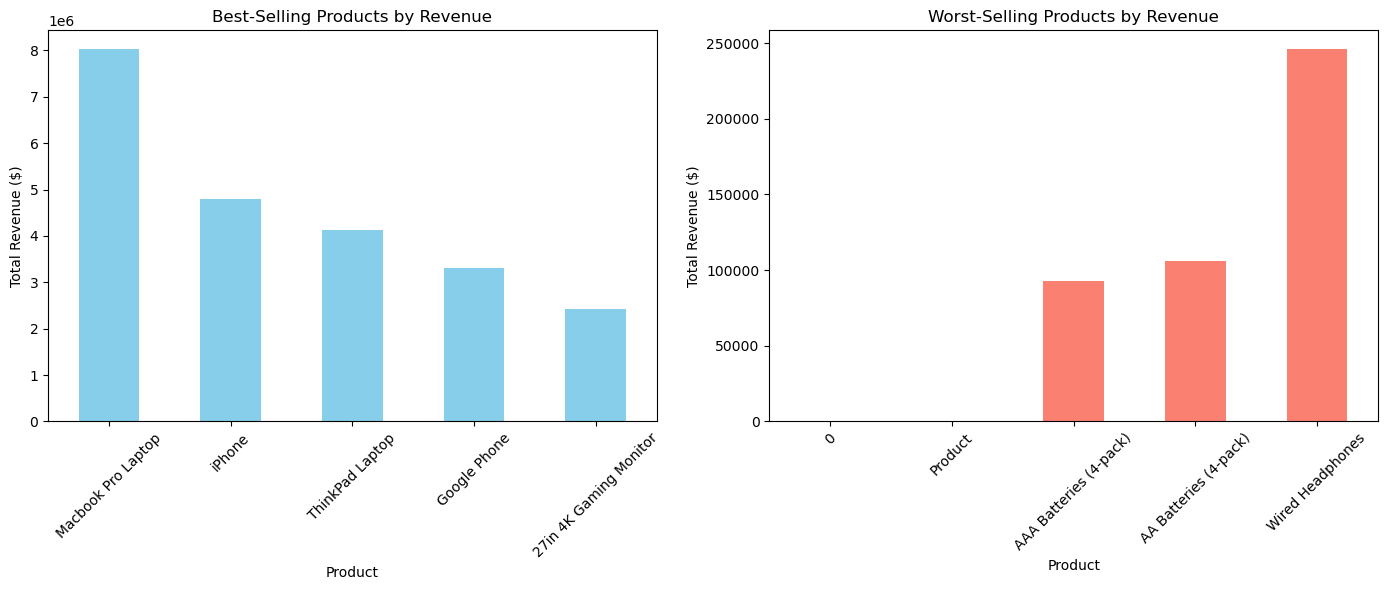

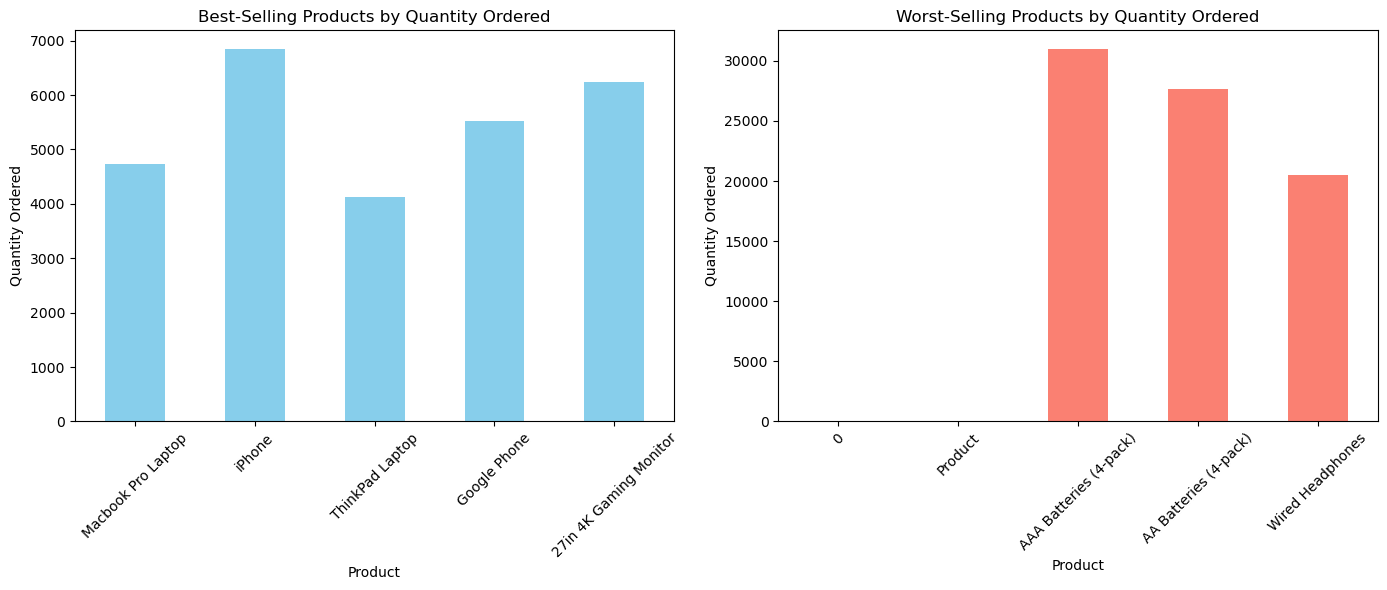

In [59]:
# 3. Product Performance: What are the best-selling and worst-selling products in terms of revenue and quantity sold?

# Group by product and calculate total revenue and quantity sold
product_performance = Final_Sales_2019.groupby('Product')[['Total_Revenue', 'Quantity_Ordered']].sum()

# Sort products by total revenue and quantity sold
best_selling_products = product_performance.sort_values('Total_Revenue', ascending=False).head(5)
worst_selling_products = product_performance.sort_values('Total_Revenue', ascending=True).head(5)

# Display the results
print("Best-Selling Products (Revenue):")
print(best_selling_products)
print("\nWorst-Selling Products (Revenue):")
print(worst_selling_products)

# Plotting the best-selling products
plt.figure(figsize=(14, 6))

# Plot Total Revenue for Best-Selling Products
plt.subplot(1, 2, 1)
best_selling_products['Total_Revenue'].plot(kind='bar', color='skyblue')
plt.title('Best-Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

# Plot Total Revenue for Worst-Selling Products
plt.subplot(1, 2, 2)
worst_selling_products['Total_Revenue'].plot(kind='bar', color='salmon')
plt.title('Worst-Selling Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot Quantity Ordered for Best-Selling Products
plt.figure(figsize=(14, 6))

# Plot Quantity Ordered for Best-Selling Products
plt.subplot(1, 2, 1)
best_selling_products['Quantity_Ordered'].plot(kind='bar', color='skyblue')
plt.title('Best-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)

# Plot Quantity Ordered for Worst-Selling Products
plt.subplot(1, 2, 2)
worst_selling_products['Quantity_Ordered'].plot(kind='bar', color='salmon')
plt.title('Worst-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


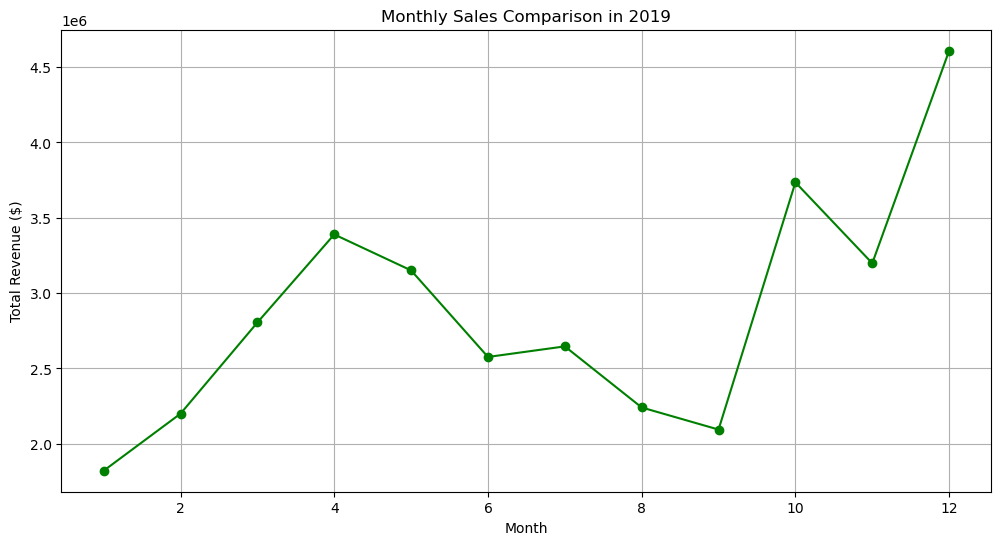

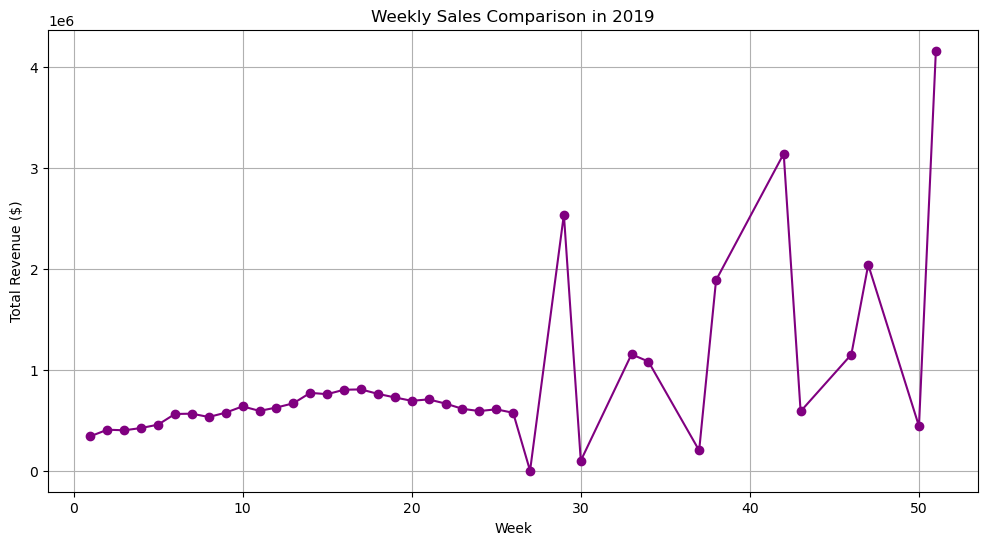

In [60]:

# 4. Time Comparison: How do sales numbers compare across different time periods (months and weeks) ? Are there any trends, patterns or inconsistencies?

# Sales comparison by month
monthly_sales = Final_Sales_2019.groupby('Month')['Total_Revenue'].sum()

# Sales comparison by week
weekly_sales = Final_Sales_2019.groupby('Week')['Total_Revenue'].sum()

# Plot monthly sales comparison
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Comparison in 2019')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()

# Plot weekly sales comparison
plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Weekly Sales Comparison in 2019')
plt.xlabel('Week')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.show()



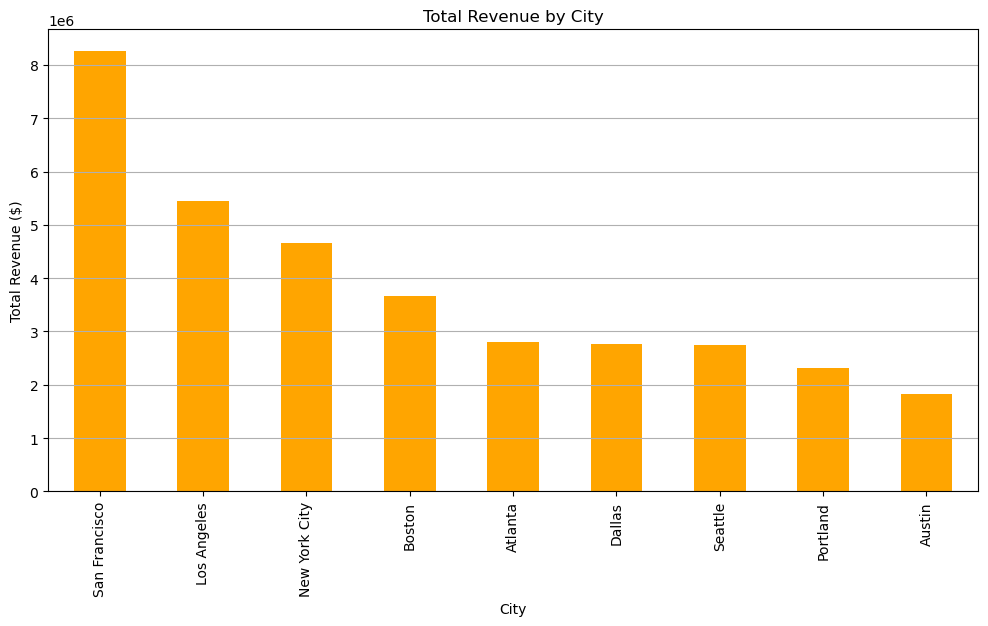

In [61]:
# 5. Geographic Distribution: Which cities contribute the most to product deliveries and sales?

# Group by city and calculate total revenue
city_sales = Final_Sales_2019.groupby('City')['Total_Revenue'].sum()

# Plot sales by city
plt.figure(figsize=(12, 6))
city_sales.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.grid(True, axis='y')
plt.show()


Product Category Analysis:
               Total_Revenue  Quantity_Ordered
Product_Level                                 
Basic-Level     2.419990e+06          139655.0
High-Level      3.204555e+07           69157.0


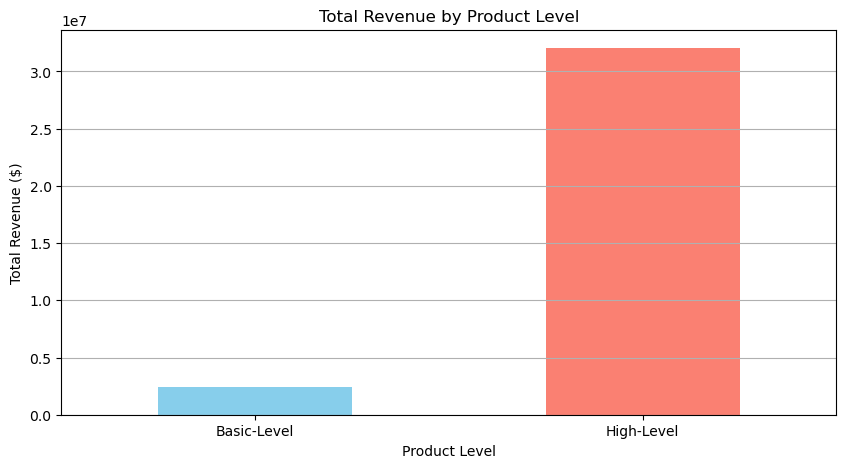

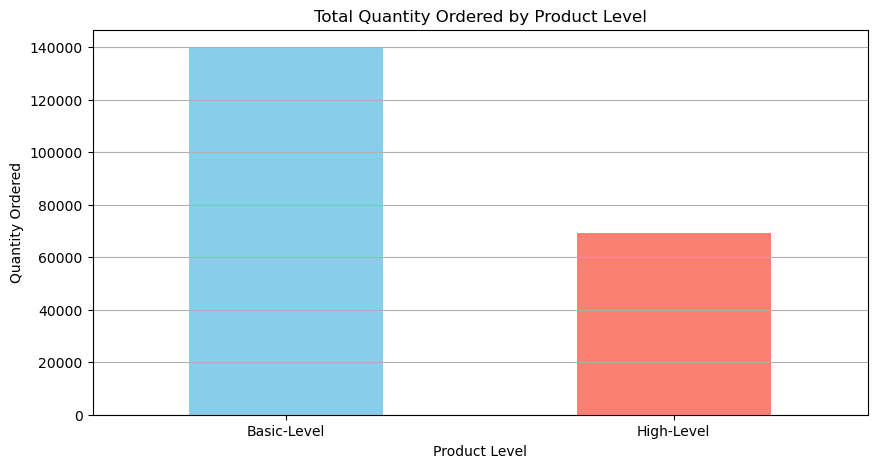

In [62]:
# 6. Product Category Analysis: Compare product categories in terms of revenue and quantities sold
# Group by product level (High-Level, Basic-Level) and calculate total revenue and quantities sold
category_performance = Final_Sales_2019.groupby('Product_Level')[['Total_Revenue', 'Quantity_Ordered']].sum()

# Print the product category analysis
print("Product Category Analysis:")
print(category_performance)

# Plot revenue by product level
plt.figure(figsize=(10, 5))
category_performance['Total_Revenue'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Revenue by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Total Revenue ($)')
plt.grid(True, axis='y')
plt.xticks(rotation=0)  # Improve readability
plt.show()

# Plot quantity sold by product level
plt.figure(figsize=(10, 5))
category_performance['Quantity_Ordered'].plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Quantity Ordered by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Quantity Ordered')
plt.grid(True, axis='y')
plt.xticks(rotation=0)  # Improve readability
plt.show()


In [63]:
csv_filename='Final_Sales_2019.csv'
Final_Sales_2019.to_csv(csv_filename,index= False)

### Key Insights